In [1]:
import pandas as pd
import numpy as np

In [29]:
from tqdm import tqdm


In [2]:
from sklearn.preprocessing import MultiLabelBinarizer

In [14]:

btdf = pd.read_parquet(r'C:/Users/ppaul/Documents/AI-strategies-papers-regulations-monitoring/data/s2orc/processed_big.parquet')
cit_df = pd.read_parquet(r'C:/Users/ppaul/Documents/AI-strategies-papers-regulations-monitoring/data/s2orc/big_ai_dataset.parquet')
cdf = cit_df[['paper_id','inbound_citations','outbound_citations']]
df = pd.merge(btdf,cdf,on='paper_id')

In [2]:
df = pd.read_parquet(r'C:/Users/ppaul/Documents/AI-strategies-papers-regulations-monitoring/data/s2orc/big_ai_dataset_with_affiliations_extended_oa.parquet')

In [11]:
df.to_parquet(r'C:/Users/ppaul/Documents/AI-strategies-papers-regulations-monitoring/data/s2orc/big_ai_dataset_with_affiliations_extended_oa.parquet')

In [12]:
df

,paper_id,year,doi,out_citations_count,in_citations_count,outbound_citations,inbound_citations,open_alex,institutions,countries,types,unique_institutions,BT_percent,authors_number,double_affiliation,company
0,199668001,2019.0,10.1007/s00521-019-04443-y,27,0,"[106476531, 67083539, 36731616, 34616216, 1096...",[],[{'author': {'display_name': 'Ksenija Tijanić'...,"[[University of Rijeka], [University of Rijeka...","[[HR], [HR], [HR]]","[[education], [education], [education]]","[University of Osijek, University of Rijeka]",0.0,3,0.0,0.0
8,8392651,2013.0,10.1016/j.future.2012.05.026,26,21,"[214797870, 58458964, 17936051, 12869238, 5121...","[49339994, 9108558, 55589961, 14721032, 532882...",[{'author': {'display_name': 'Kathleen Ericson...,"[[Colorado State University], [Colorado State ...","[[US], [US]]","[[education], [education]]",[Colorado State University],0.0,2,0.0,0.0
11,62653139,2015.0,10.1016/j.aci.2014.07.002,19,16,"[37784376, 16497245, 27557292, 6492502, 360497...","[155109586, 56086061, 22896920, 52883785, 7804...",[{'author': {'display_name': 'Neda Abdelhamid'...,[[De Montfort University]],[[GB]],[[education]],[De Montfort University],0.0,1,0.0,0.0
12,62656209,2012.0,10.4995/var.2012.4372,5,2,"[190739834, 8675354, 60452706, 109165564, 1384...","[42927847, 64895295]","[{'author': {'display_name': 'Vera Moitinho', ...","[[Autonomous University of Barcelona], [Autono...","[[ES], [ES]]","[[education], [education]]",[Autonomous University of Barcelona],0.0,2,0.0,0.0
17,88483477,2019.0,10.1117/12.2511890,7,1,"[42407660, 79871509, 38824009, 22018015, 20776...",[210123596],"[{'author': {'display_name': 'Xiangyuan Ma', '...","[[Sun Yat-sen University], [University of Mich...","[[CN], [US], [US], [US], [US], [US], [US], [US...","[[education], [education], [education], [educa...","[United States Food and Drug Administration, U...",0.0,10,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557669,16710555,2010.0,10.1007/978-3-642-13022-9_59,10,2,"[57256200, 46011309, 5907868, 1049011, 1170894...","[65535570, 14191836]","[{'author': {'display_name': 'Amber McKenzie',...","[[], [], [], []]","[[], [], [], []]","[[], [], [], []]",[],0.0,4,0.0,0.0
557671,16715952,2013.0,10.1007/978-3-642-40991-2_26,19,12,"[901118, 14091499, 14672953, 183466, 10366378,...","[3999959, 10791446, 14102602, 10317326, 156242...","[{'author': {'display_name': 'Kai-Wei Chang', ...","[[University of Illinois Urbana-Champaign], [U...","[[US], [US], [US]]","[[education], [education], [education]]",[University of Illinois Urbana-Champaign],0.0,3,0.0,0.0
557675,64996845,2018.0,10.1007/978-3-319-77276-9_30,0,1,[],[181671411],[{'author': {'display_name': 'S. Johny Samuael...,"[[Texas A&M University – Corpus Christi], [Uni...","[[US], [None], [None]]","[[education], [None], [None]]","[Holy Cross Coll, University VOC College of En...",0.0,3,0.0,0.0
557677,211545971,2020.0,10.1155/2020/1375426,43,0,"[71150591, 51868425, 2528603, 96431222, 102440...",[],"[{'author': {'display_name': 'Cheng Xu', 'id':...","[[Beijing Union University], [Beijing Union Un...","[[CN], [CN], [CN], [CN]]","[[education], [education], [education], [gover...","[State Administration of Work Safety, Beijing ...",0.0,4,0.0,0.0


In [17]:
df.iloc[0]['open_alex']

array([{'author': {'display_name': 'Ksenija Tijanić', 'id': 'https://openalex.org/A2762169277', 'orcid': 'https://orcid.org/0000-0002-3633-2256'}, 'author_position': 'first', 'institutions': array([{'country_code': 'HR', 'display_name': 'University of Rijeka', 'id': 'https://openalex.org/I154347574', 'ror': 'https://ror.org/05r8dqr10', 'type': 'education'}],
             dtype=object), 'raw_affiliation_string': 'Faculty of Civil Engineering , University of Rijeka , Rijeka , Croatia .'}                                                                                                                                                                                                                                       ,
       {'author': {'display_name': 'Diana Car-Pušić', 'id': 'https://openalex.org/A1491253522', 'orcid': 'https://orcid.org/0000-0003-2555-335X'}, 'author_position': 'middle', 'institutions': array([{'country_code': 'HR', 'display_name': 'University of Rijeka', 'id': 'https://

In [18]:
institutions = []
countries = []
types = []
for index, row in df.iterrows():
    institutions_per_paper = []
    countries_per_paper = []
    types_per_paper = []
    if row['open_alex'] is not None:
        for author in row['open_alex']:
            try:
                institution_per_author = []
                countries_per_author = []
                types_per_author = []
                for institution in author['institutions']:
                    institution_per_author.append(institution['display_name'])
                    countries_per_author.append(institution['country_code'])
                    types_per_author.append(institution['type'])
                institutions_per_paper.append(institution_per_author)
                countries_per_paper.append(countries_per_author)
                types_per_paper.append(types_per_author)
            except KeyError:
                institutions_per_paper.append("no data")
                countries_per_paper.append("no data")
                types_per_paper.append("no data")
    institutions.append(institutions_per_paper)
    countries.append(countries_per_paper)
    types.append(types_per_paper)

In [19]:

df['institutions'] = institutions
df['countries'] = countries
df['types'] = types


unique_institutions_per_paper = []
for paper in institutions:
    unique_institutions = set()
    if paper != []:
        for author in paper:
            for affiliation in author:
                if affiliation not in unique_institutions:
                    unique_institutions.add(affiliation)
    unique_institutions_per_paper.append(list(unique_institutions))

df['unique_institutions'] = unique_institutions_per_paper

unique_institutions_joint = []
for paper in unique_institutions_per_paper:
    if paper == []:
        unique_institutions_joint.append("no data")
    else:
        for affiliation in paper:
            unique_institutions_joint.append(affiliation)


unique_types_per_paper = []
for paper in types:
    unique_types = set()
    if paper != []:
        for author in paper:
            for type in author:
                if type not in unique_types:
                    if type is not None:
                        unique_types.add(type)
        unique_types = list(unique_types)
        unique_types_str = ' '.join(unique_types)
        if unique_types_str == '':
            unique_types_str = 'no data'
    else:
        unique_types_str = 'no data'
    unique_types_per_paper.append(unique_types_str)


unique_countries_per_paper = []
for paper in countries:
    unique_countries = set()
    if paper != []:
        for author in paper:
            for country in author:
                if country not in unique_countries:
                    unique_countries.add(country)
    unique_countries_per_paper.append(list(unique_countries))

unique_countries_joint = []
for paper in unique_countries_per_paper:
    if paper == []:
        unique_countries_joint.append("no data")
    else:
        for country in paper:
            unique_countries_joint.append(country)


In [6]:
double_af = []
company = []
#percent of authors with double aff
#company column
for _,paper in df.iterrows():
    is_c = 0
    is_2 = 0
    for institution_types in paper['types']:
        for t in institution_types:
            if t =='company':
                is_c+=1
                break
        if is_c>0:
            for t in institution_types:
                if t !='company':
                    is_2+=1
                    break
        
    company.append(is_c/(len(paper['types'])+0.0001))
    double_af.append(is_2/(len(paper['types'])+0.0001))
df['double_affiliation'] = double_af
df['company'] = company


In [10]:
df[df['company']>0]

,paper_id,year,doi,out_citations_count,in_citations_count,outbound_citations,inbound_citations,open_alex,institutions,countries,types,unique_institutions,BT_percent,authors_number,double_affiliation,company
53,59159027,2018.0,10.1007/978-3-030-11009-3_14,25,1,"[14042655, 52284663, 502946, 2255738, 14547347...",[201070554],[{'author': {'display_name': 'Fabian Brickwedd...,"[[Goethe University Frankfurt, Robert Bosch], ...","[[DE, DE], [DE], [DE]]","[[education, company], [company], [education]]","[Robert Bosch, Goethe University Frankfurt]",0.000000,3,0.666644,0.666644
88,4633214,2018.0,10.1007/978-3-030-01252-6_4,28,157,"[11096669, 15425191, 15195762, 2554264, 632505...","[209414673, 209376368, 199442423, 78088951, 21...","[{'author': {'display_name': 'Nanyang Wang', '...","[[Fudan University], [Princeton University], [...","[[CN], [US], [None], [CN], [CN], [CN]]","[[education], [education], [None], [education]...","[Intel Architecture Labs, Fudan University, Te...",0.166667,6,0.166664,0.166664
155,57310780,1991.0,10.1049/ip-f-2.1991.0008,0,5,[],"[123085040, 61410127, 3384915, 25472029, 62246...",[{'author': {'display_name': 'G. D. Tattersall...,"[[University of East Anglia], [University of E...","[[GB], [GB], [GB]]","[[education], [education], [company]]","[University of East Anglia, BT Group]",0.000000,3,0.000000,0.333322
234,27121881,2008.0,10.1162/artl.2008.14.2.203,45,10,"[5530467, 98000441, 59704473, 36370590, 108515...","[16646425, 214903009, 5577321, 12448250, 27466...","[{'author': {'display_name': 'Larry Bull', 'id...","[[Schlumberger], [University of the West of En...","[[IE], [GB], [GB], [GB], [GB], [GB]]","[[company], [education], [education], [educati...","[Schlumberger, University of the West of England]",0.000000,6,0.833319,0.166664
263,59931238,2004.0,10.1057/palgrave.kmrp.8500027,15,1,"[59643147, 15453639, 9504560, 12476939, 557672...",[37932781],[{'author': {'display_name': 'Albert L. Harris...,"[[Appalachian State University], [Appalachian ...","[[US], [US], [CH]]","[[education], [education], [company]]","[Appalachian State University, Roche]",0.000000,3,0.000000,0.333322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557159,91186755,2019.0,10.1145/3306202,34,4,"[22640035, 5804465, 2042448, 14796162, 6071358...","[204757908, 202750269, 166227926, 202699645]","[{'author': {'display_name': 'Raghid Morcel', ...","[[American University of Beirut], [American Un...","[[LB], [LB], [LB], [LB], [LB], [US], [US]]","[[education], [education], [education], [educa...","[American University of Beirut, Intel]",0.285714,7,0.000000,0.285710
557189,44073530,2018.0,10.1145/3197517.3201283,65,89,"[10320049, 13012110, 2803614, 203705211, 21547...","[195345045, 54134066, 52070144, 207900737, 210...","[{'author': {'display_name': 'Hyeongwoo Kim', ...","[[Max Planck Institute for Informatics], [Tech...","[[DE], [DE], [DE], [DE], [DE], [DE], [DE], [GB...","[[facility], [company], [facility], [facility]...","[Max Planck Institute for Informatics, Technic...",0.000000,10,0.699993,0.199998
557344,46761335,2017.0,10.1109/icodse.2017.8285884,12,1,"[207212687, 16875768, 17750108, 7792962, 63009...",[208280325],[{'author': {'display_name': 'Pranjal Ambardek...,"[[Intel], [Intel], [Intel]]","[[US], [US], [US]]","[[company], [company], [company]]",[Intel],1.000000,3,0.000000,0.999967
557358,3054554,2015.0,10.1145/2786805.2804431,10,5,"[13040187, 2437629, 6706547, 9279336, 20721271...","[21164835, 53285779, 52196064, 207591052, 645561]",[{'author': {'display_name': 'Juliana Saraiva'...,"[[Federal University of Pernambuco], [Microsof...","[[BR], [US], [US]]","[[education], [company], [company]]","[Microsoft, Federal University of Pernambuco]",0.666667,3,0.000000,0.666644


array([[<AxesSubplot:title={'center':'BT_percent'}>]], dtype=object)

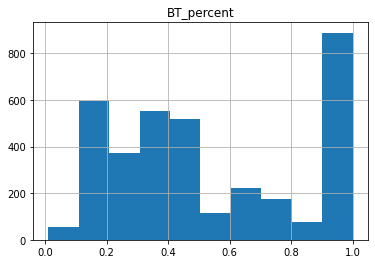

In [29]:
df[df['BT_percent']!=0].hist(column = 'BT_percent')

In [33]:
df[df['BT_percent']!=0.0]

TypeError: 'NoneType' object is not subscriptable

In [34]:
df.to_parquet(r'C:/Users/ppaul/Documents/AI-strategies-papers-regulations-monitoring/data/s2orc/big_ai_dataset_with_affiliations_extended_oa.parquet')

AttributeError: 'NoneType' object has no attribute 'to_parquet'

sum inbound_citations that has meme of publication with this meme and\sum inbound_citations of publication with this meme
sum (pub that has a meme and does not have a meme-carrer in inbound_citations)/sum(pub that do not cite meme carrers)

In [15]:
meme_list = dict()
memes=[]
for chunks_list in df['noun_chunks_cleaned']:
    for chunk in chunks_list:
        if chunk not in meme_list:
            meme_list[chunk]=1
            memes.append(chunk)
        else:
            meme_list[chunk]+=1

In [ ]:
#for i in df.iterrows:
#    memes[0] in i['noun_chunks_cleaned']#df[]all() not in df['outbound_citations']


: 

In [17]:
inc=[]
out=[]
for i,row in df.iterrows():
    cit =[]
    for cited in row['outbound_citations']:
        cited = int(cited)
        if cited in df['paper_id']:
            cit.append(cited)
        
    out.append(cit)
    cit=[]
    for citing in row['inbound_citations']:
        citing = int(citing)
        if citing in df['paper_id']:
            cit.append(citing)
    inc.append(cit)
df['inbound_citations_clear']=inc
df['outbound_citations_clear']=out

In [19]:
df.to_parquet('meme_score.parquet')

In [20]:
df['noun_chunks_cleaned'] = df['noun_chunks_cleaned'].apply(list)

In [107]:
df['noun_chunks_cleaned'].str.contains('a a b b',regex=False).sum()

1

In [79]:
enc = MultiLabelBinarizer(sparse_output=True)
memes_enc = enc.fit_transform(df['noun_chunks_cleaned'])

In [95]:
enc.classes_.tolist()

['',
 'a a a topology',
 'a a b b',
 'a a baseline approach',
 'a a baseline single classifier framework',
 'a a big pool',
 'a a brute force optimization',
 'a a cad system design',
 'a a classical rule base system',
 'a a classification tree',
 'a a clear functional separation',
 'a a comparison',
 'a a compound rule base expert system',
 'a a concert like condition',
 'a a contextual combination',
 'a a conventional feedforward multilayer neural network',
 'a a d tree expository',
 'a a data fidelity term',
 'a a datum drive initial segmentation',
 'a a decision theory model',
 'a a design',
 'a a design workflow',
 'a a domain level plan recognizer',
 'a a family',
 'a a fast prototype sdr platform',
 'a a fault detector',
 'a a first order approximation',
 'a a fuzzy expert system',
 'a a general image sentiment classifier',
 'a a generator g',
 'a a good feature extraction technique',
 'a a hybrid assemble architecture',
 'a a knowledge base',
 'a a learning framework',
 'a a los

Zbadałam częstości memów. 
Wykasowałam memy

OneHotEncoding memów w paperach cytowanych.

In [111]:
#a mask to apply to list of memes(nonexistent as of now)
memes_mask = np.nonzero(memes_enc.sum(axis=0)-1)[1]
memes_enc_cleaned = memes_enc[:,memes_mask]

<505000x846793 sparse matrix of type '<class 'numpy.int32'>'
	with 14533478 stored elements in Compressed Sparse Row format>

In [73]:
#frequency of memes
pd.DataFrame(np.sort(memes_enc.sum(axis=0))).T.value_counts()

1         3036974
2          398942
3          137087
4           70562
5           42965
           ...   
1836            1
1839            1
1840            1
1841            1
251321          1
Length: 2099, dtype: int64

In [124]:
df.index = df['paper_id']

In [220]:
df

,paper_id,doc_lens,nouns,noun_chunks,lemmas,noun_chunks_cleaned,inbound_citations,outbound_citations,inbound_citations_clear,outbound_citations_clear,memes_in_cited
paper_id,,,,,,,,,,,
199668001,199668001,196,"[Road, construction, projects, territory, over...","[Road construction projects, the territory, th...","[road, construction, project, on, the, territo...","[road construction project, territory, republi...",[],"[106476531, 67083539, 36731616, 34616216, 1096...",[],[],[]
2879234,2879234,235,"[nets, CNNs, performance, history, approaches,...","[Convolutional neural nets, CNNs, remarkable p...","[convolutional, neural, net, (, cnn, ), have, ...","[convolutional neural net, cnn, remarkable per...","[11015941, 52160763, 199488257, 23874112, 4241...","[206592419, 215721, 10111903, 1003907, 3198903...","[340420, 471907, 250792]","[215721, 127386, 392527]","[term, overall goal, numerous network activity..."
17786914,17786914,120,"[results, benchmarks, modeling, speech, recogn...","[excellent results, benchmarks, acoustic model...","[recently, ,, deep, neural, networks(DNNs, ), ...","[excellent result, benchmark, acoustic modelin...",[198931159],"[9530137, 398770, 207168299, 14832074, 1799800...",[],"[398770, 299222]","[very good computational efficiency, training ..."
17432300,17432300,235,"[characters, structure, character, arrangement...","[East-Asian characters, a rich hierarchical st...","[east, -, asian, character, possess, a, rich, ...","[east asian character, rich hierarchical struc...","[15983137, 7625356, 15404413, 199472639, 47640...","[371064, 3246932, 8991475, 36725681, 32031694,...",[467570],[371064],"[geometric consistency, correspondence, image,..."
204957502,204957502,33,"[Internet, articles, multimedia, content, life...","[the Internet, countless articles, multimedia ...","[with, the, internet, become, widespread, ,, c...","[internet, countless article, multimedia conte...",[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
127628365,127628365,179,"[models, strength, phenomena, reality, self, o...","[Abstract Probabilistic models, their strength...","[Abstract, Probabilistic, model, have, prove, ...","[abstract probabilistic model, strength, many ...",[],[],[],[],[]
11619477,11619477,189,"[AD, courses, patients, period, time, points, ...","[Alzheimer's Disease (AD, different courses, s...","[Alzheimer, 's, Disease, (, ad, ), can, take, ...","[alzheimer disease ad, different course, patie...",[204230004],"[34935848, 27355075, 9895278, 8461070, 3276119...",[],[],[]
5807289,5807289,217,"[Concurrency, bugs, software, testing, nature,...","[Concurrency bugs, software testing, their non...","[concurrency, bug, be, notoriously, difficult,...","[concurrency bug, software testing, non determ...","[15460152, 69949082, 5076939, 18091491, 678683...","[9005386, 17620776, 3439914, 978769, 2941443, ...",[],[],[]


In [222]:
memes_in_cited = []
#I want new column of unique noun chunks in all cited papers
for i,paper in tqdm(df.iterrows()):
    if paper['outbound_citations_clear'].size>0:
        #only memes in cited papers:
        c = df.iloc[paper['outbound_citations_clear']]['noun_chunks_cleaned']
        
        memes_in_cited.append(list(set(c.explode())))
    else:
        memes_in_cited.append(list(set()))

505000it [01:04, 7776.69it/s]


In [223]:
df['memes_in_cited']=memes_in_cited

In [243]:
a = df['memes_in_cited'].dropna()

In [245]:
a.str.len()

paper_id
2879234     96
17786914    99
17432300    83
62651912    32
62653139    27
            ..
11301469    24
53770387    48
6048192     27
15894398    28
15895702    15
Name: memes_in_cited, Length: 115089, dtype: int64

In [231]:
df['memes_in_cited'] = df['memes_in_cited'].dropna().apply(list)

In [250]:
all_memes = a.explode()

In [254]:
set(all_memes)

{'',
 'behavior tracking',
 'new graph learn algorithm',
 'standard svm',
 'its possible morphological constituent',
 'policy gradient technique',
 'expand operating space',
 'validity guide fuzzy cluster evaluation',
 'fertilizer',
 'coke oven gas collector coupling',
 'multi channel sample',
 'autonomy framework',
 'interactive play',
 'bpa',
 'model free base ipd controller',
 'phonetic control sequence',
 'specific artificial neural network paradigm',
 'generate index',
 'real time and accuracy index',
 'osana',
 'pattern evaluation',
 'fp cluster',
 'hardware intellectual property',
 'challenge toartificial intelligence',
 'combustible chemical residue',
 'significantly low perplexity',
 'other assessment method',
 'current lead automate va coding method',
 'combustor component',
 'particular source',
 'only authentication',
 'such demand application',
 'adequate believable behavior',
 'amateur skilled forgery',
 'main influence factor',
 'substantial information',
 'new research 

In [257]:
c_enc = MultiLabelBinarizer(sparse_output=True)
cited_memes_enc = c_enc.fit_transform(a)

TypeError: 'NoneType' object is not callable

parquet ilości noun chunków 

In [ ]:
cited_memes_enc_cleaned = cited_memes_enc[:,memes_mask]

In [ ]:
from tqdm import tqdm
#instead: two oneHotEncodings. First: which memes appear in paper. Second: which  memes appear in cited papers.
#p_spark 1: sum in papers axis of all ones of ohe1&ohe2.
#meme axis=0, papers axis=1

cited_memes_enc_cleaned.sum(axis=1)
(1-cited_memes_enc_cleaned).sum(axis=1)
cited_memes_enc_cleaned.multiply(memes_enc_cleaned).sum(axis=1)
(1-cited_memes_enc_cleaned).multiply(memes_enc_cleaned).sum(axis=1)

p_spark1 = []
p_spark2 = []
p_stick1 = []
p_stick2 = []
for key in tqdm(memes):
    #does it have meme? in OneHot: memes_enc
    c = df['noun_chunks_cleaned'].str.contains(key,regex=False)
    #does it cite meme carrers? in OneHot: all memes in citated
    c_spark = df['outbound_citations_clear'].str.contains(any(df[c]['paper_id']),regex=False)
    c_stick = ~c_spark
    

    p_spark1.append((c_spark&c).sum())
    p_spark2.append(c_spark.sum())
    p_stick1.append((c_stick&c).sum())
    p_stick2.append(c_stick.sum())

    
    

  0%|          | 5/3883767 [00:11<2498:41:11,  2.32s/it]


KeyboardInterrupt: 

: 